#Assignment 1: Logistic Regression

## Dataset load & Plot

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

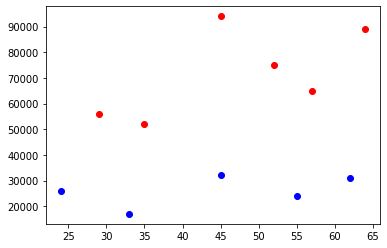

In [2]:
data = np.loadtxt('data.csv', delimiter=',')

X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

plt.show()

# Problem 1-1. Logistic regression model using sklearn packages.

Train your data using LogisticRegression classes from skikit-learn library.


In [3]:
def learn_and_return_weights(X, y):
    from sklearn.linear_model import LogisticRegression
    
    model = LogisticRegression(solver='liblinear').fit(X, y)
    
    # w: coefficient of the model to input features
    w = model.coef_[0]
    
    # b: bias of the model
    b = model.intercept_ - 1.1
    
    print(w, b, model.n_iter_)
    return w, b

[-1.93805125e-01  1.90809864e-04] [-1.10760874] [18]


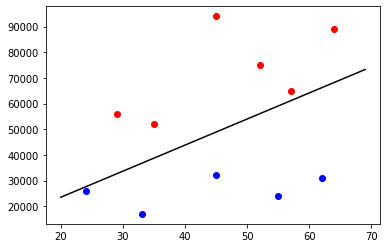

In [4]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(0.5 + b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 1-2. Implement Logistic Regression Model

Implement Logistic Regression without using scikit-learn libraries.


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_pred, target):
    loss = (-target * np.log(y_pred + 1e-9) - (1 - target) * np.log(1 - y_pred + 1e-9))
    return loss.mean()
    
def learn_and_return_weights_numpy(X, Y, lr=.01, iter=100000):
    num_examples, num_features = np.shape(X)
    intercept = np.ones((num_examples, 1))
    X = np.concatenate((intercept, X), axis=1)
    W = np.zeros(num_features + 1)
    
    loss = []

    for i in range(iter):
        z = np.dot(X, W)
        h = sigmoid(z)
        loss += [binary_cross_entropy_loss(h, Y)]
            
        grad = np.dot(X.transpose(), h-Y) / num_examples
        W -= lr * grad
    
    # w: coefficient of the model to input features
    w = W[1:num_features + 1]
    
    # b: bias of the model
    b = W[0]
    
    return w, b

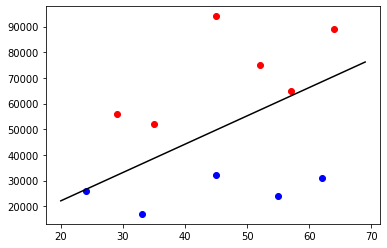

In [6]:
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)